In [11]:
%%capture
%run preprocessing.ipynb

In [12]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load data
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

solvers = ['svd', 'lsqr', 'eigen']

measures = []

for solver in solvers:
    # Create an LDA object
    if solver == 'svd':
        lda_model = LinearDiscriminantAnalysis(solver=solver, shrinkage=None)
    else:
        lda_model = LinearDiscriminantAnalysis(solver=solver, shrinkage='auto')

    # Train the LDA model
    lda_model.fit(X_train, y_train)

    # Make predictions
    y_pred = lda_model.predict(X_test)

    # Evaluate performance
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted')
    recall = metrics.recall_score(y_test, y_pred, average='weighted')
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')

    measures.append({'solver': solver, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1})

In [13]:
# Print results in a table
measures_df = pd.DataFrame(measures)
print(measures_df)

  solver  accuracy  precision    recall        f1
0    svd  0.805273   0.809213  0.805273  0.806356
1   lsqr  0.805339   0.809274  0.805339  0.806423
2  eigen  0.805339   0.809274  0.805339  0.806423


<Axes: >

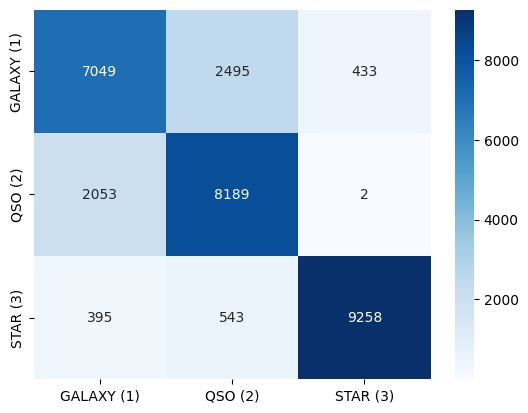

In [14]:
import seaborn as sns

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

We can conclude that all solvers reach similar results, and they all have values a little below other methods  
Might be because the distribution is not normal, or the covariance matrices are not equal, or even that the decision  
boundary is simply not extremely correct

In [18]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Load data
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

reg_params = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

measures = []
for reg_params in reg_params:
    # Create a QDA object
    qda = QuadraticDiscriminantAnalysis(reg_param=reg_params)

    # Train the QDA model
    qda.fit(X_train, y_train)

    # Make predictions
    y_pred = qda.predict(X_test)

    # Evaluate performance
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted')
    recall = metrics.recall_score(y_test, y_pred, average='weighted')
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')

    measures.append({'reg_param': reg_params, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1})

In [19]:
measures_df = pd.DataFrame(measures)
print(measures_df)

    reg_param  accuracy  precision    recall        f1
0         0.0  0.961042   0.961048  0.961042  0.961010
1         0.1  0.870467   0.873914  0.870467  0.869198
2         0.2  0.830687   0.832445  0.830687  0.830332
3         0.3  0.804945   0.806675  0.804945  0.804857
4         0.4  0.786797   0.788570  0.786797  0.786687
5         0.5  0.770293   0.772085  0.770293  0.770120
6         0.6  0.753099   0.754553  0.753099  0.752949
7         0.7  0.733406   0.733906  0.733406  0.733049
8         0.8  0.709110   0.708177  0.709110  0.708327
9         0.9  0.684617   0.680731  0.684617  0.682113
10        1.0  0.651938   0.643145  0.651938  0.644908


Conclusion: regularization seems to be prejudicial in our problem

<Axes: >

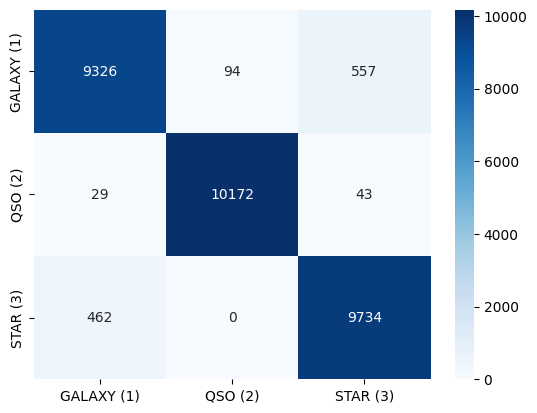

In [20]:
import seaborn as sns

# Get the best model again (reg_param = 0.0)
qda = QuadraticDiscriminantAnalysis(reg_param=0.0)
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

The results when using a Quadratic Discriminant are better than the Linear Discriminant,  
meaning the decision boundary is not linear (and is quadratic)  
Other possible explanation is that the assumption of the equal covariance matrices is wrong